In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join('..', 'src'))

if module_path not in sys.path:
    sys.path.append(module_path)

### Fusion optimisation for simple FF net on MNIST dataset

**Assumptions:**
- Normally distributed time of training and inference across batches (and epochs in training)

In [9]:
from ff import NaiveNN, OptimizedNN
from benchmarking import compare_performance

In [10]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='../data', train=False, download=True, transform=transform)

In [11]:
tile_sizes = [32, 64, 128] # , 256, 512, 1024
num_trials = 16
num_epochs = 16

result = compare_performance(
    NaiveNN(),
    OptimizedNN(),
    trainset,
    testset,
    tile_sizes=tile_sizes,
    num_trials=num_trials,
    num_epochs=num_epochs
)


Batch Size: 32


KeyboardInterrupt: 

#### Visualisations

KeyError: 64

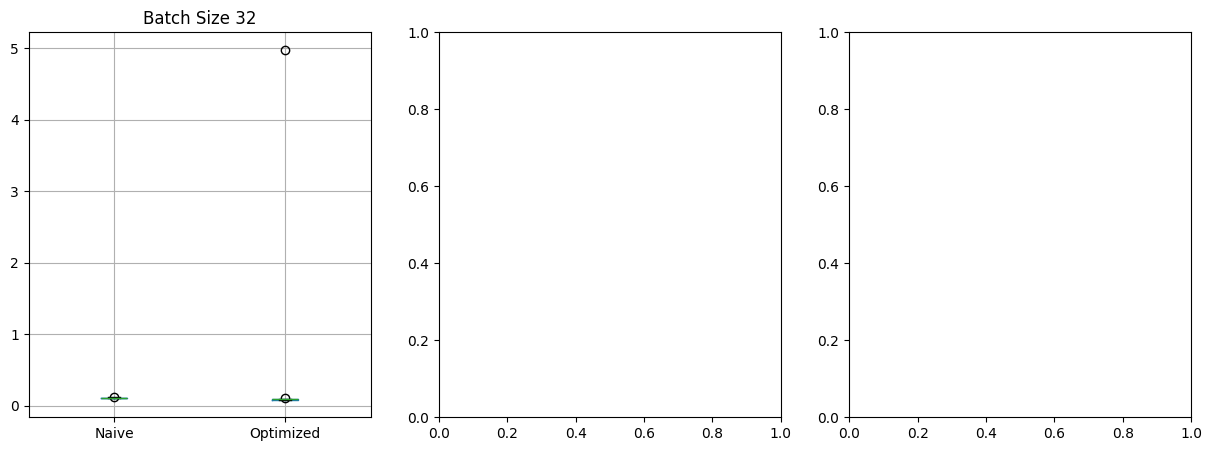

In [11]:
fig, axes = plt.subplots(1, len(tile_sizes), figsize=(15, 5))
for idx, tile_size in enumerate(tile_sizes):
    df = pd.DataFrame({
        "Naive": results[tile_size]["naive_times"],
        "Optimized": results[tile_size]["optimized_times"]
    })
    
    df.boxplot(ax=axes[idx])
    axes[idx].set_title(f'Batch Size {tile_size}')

axes[0].set_ylabel("Time (ms)")    
plt.suptitle("Inference Time Distribution Across Tile Sizes")
plt.show()


KeyError: 64

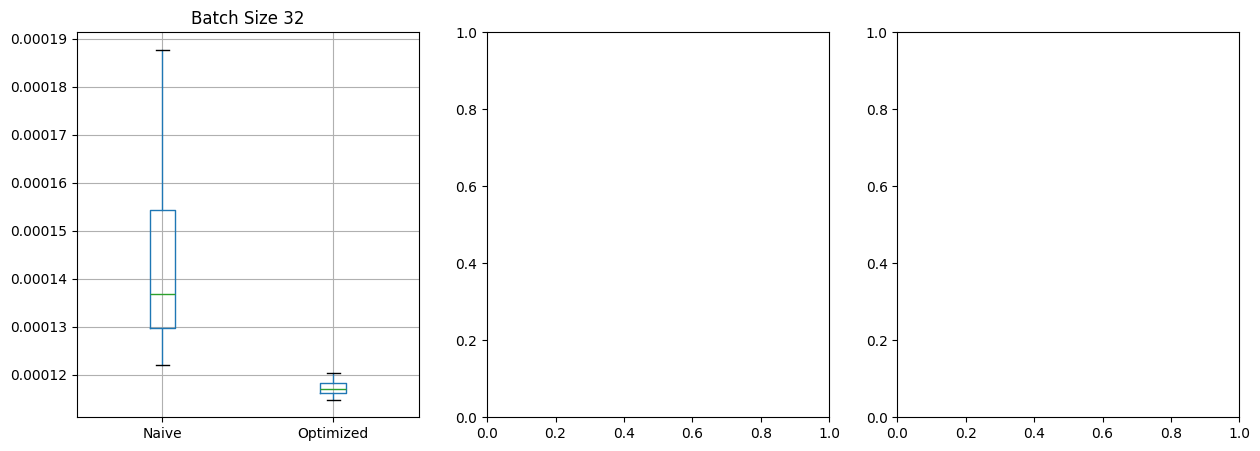

In [9]:
fig, axes = plt.subplots(1, len(tile_sizes), figsize=(15, 5))
for idx, tile_size in enumerate(tile_sizes):
    df = pd.DataFrame({
        "Naive": results[tile_size]["naive_tt_fwd"],
        "Optimized": results[tile_size]["optimized_tt_fwd"]
    })
    
    df.boxplot(ax=axes[idx])
    axes[idx].set_title(f'Batch Size {tile_size}')

axes[0].set_ylabel("Time (ms)")    
plt.suptitle("Forward propagation time Distribution Across Tile Sizes")
plt.show()


KeyError: 64

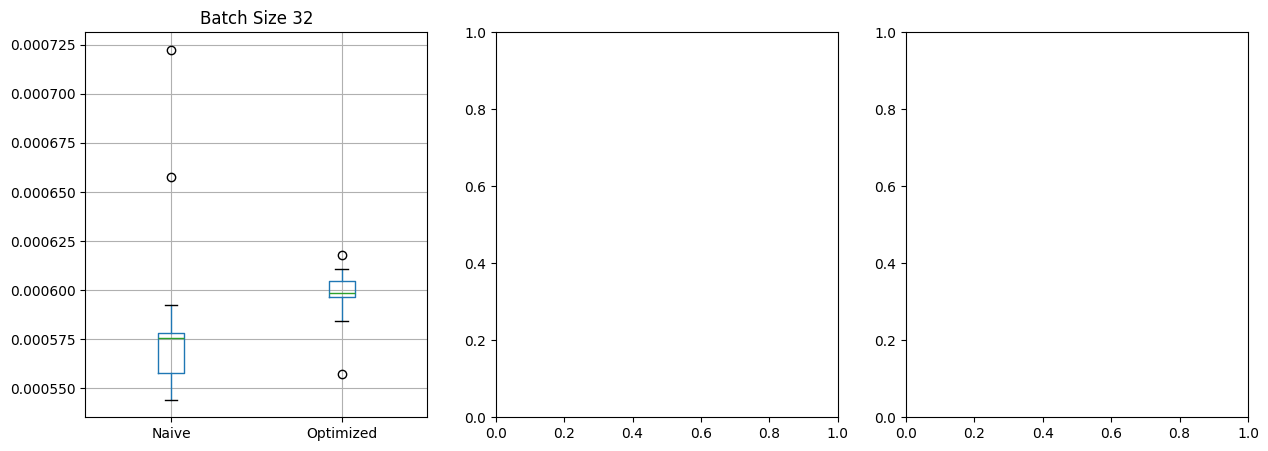

In [10]:
fig, axes = plt.subplots(1, len(tile_sizes), figsize=(15, 5))
for idx, tile_size in enumerate(tile_sizes):
    df = pd.DataFrame({
        "Naive": results[tile_size]["naive_tt_bckwd"],
        "Optimized": results[tile_size]["optimized_tt_bckwd"]
    })
    
    df.boxplot(ax=axes[idx])
    axes[idx].set_title(f'Batch Size {tile_size}')

axes[0].set_ylabel("Time (ms)")    
plt.suptitle("Backward propagation time Distribution Across Tile Sizes")
plt.show()


### Fusion optimisation for ResNet18 on MNIST dataset

In [5]:
from resnet import ResNet18, ResNet18Fused
from benchmarking import compare_performance

In [6]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='../data', train=False, download=True, transform=transform)

In [7]:
tile_sizes = [32, 64, 128] # , 256, 512, 1024
num_trials = 16
num_epochs = 16

result = compare_performance(
    ResNet18(in_dim=1, num_classes=10), # grey scale, 10 digits
    ResNet18Fused(in_dim=1, num_classes=10), # grey scale, 10 digits
    trainset,
    testset,
    tile_sizes=tile_sizes,
    num_trials=num_trials,
    num_epochs=num_epochs
)

result



Batch Size: 32


KeyboardInterrupt: 